In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
os.chdir("D:/m and i")

In [71]:
data = pd.read_excel("linearregression/house_price.xlsx")

In [72]:
data.head()

,House Number,Y:Actual Selling Price,X:House Size(100s ft2)
0,1,89.5,20.0
1,2,79.9,14.8
2,3,83.1,20.5
3,4,56.9,12.5
4,5,66.6,18.0


In [73]:
x = np.array(data[['X:House Size(100s ft2)']])
y = np.array(data[['Y:Actual Selling Price']])

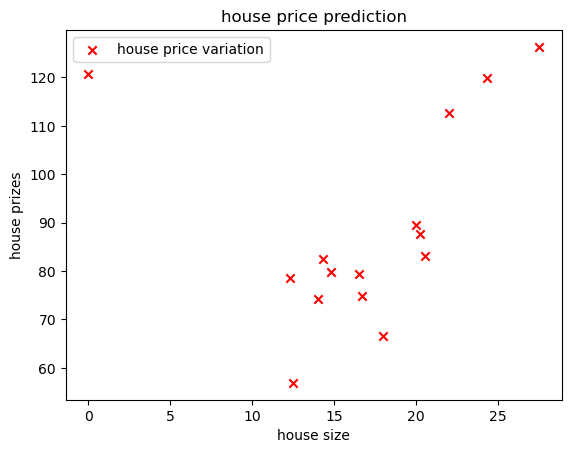

In [74]:
plt.scatter(x,y,label="house price variation",color = "red",marker ="x")
plt.xlabel("house size")
plt.ylabel("house prizes")
plt.title("house price prediction")
plt.legend()
plt.show()

In [75]:
m , n = x.shape
w = np.zeros((n,1))
alpha = 0.001
tolerence = 1e-6
bias = 0 
cost_history = []

In [76]:
for i in range(10000):
    y_pred = x.dot(w)+bias
    cost = (y_pred - y)
    m_error = np.sum(cost**2)/(2*m)
    dw = x.T.dot(cost)/m
    db = np.sum(cost)
    cost_history.append(m_error)
    w = w - alpha*dw
    bias = bias - alpha*db
    print(w, bias)
    if i > 0 and abs(cost_history[-2]-cost_history[-1]) < tolerence:
        break






[[1.53100435]] 1.3326
[[2.54330517]] 2.2569192086027465
[[3.2119085]] 2.91063490575667
[[3.65277607]] 3.3849743612092937
[[3.942746]] 3.7403863306150935
[[4.13273241]] 4.016925237553359
[[4.25647181]] 4.241131897323788
[[4.33631855]] 4.4305927937264
[[4.38708494]] 4.596961128209005
[[4.41858588]] 4.7479586149747455
[[4.43732486]] 4.888701902187881
[[4.44761118]] 5.022581479714521
[[4.45230026]] 5.1518440573396695
[[4.45328412]] 5.2779784578161415
[[4.45181646]] 5.401971315722988
[[4.44872798]] 5.524476507587197
[[4.44456911]] 5.645927418971419
[[4.43970458]] 5.766611334428233
[[4.43437604]] 5.886718729464706
[[4.42874362]] 6.00637593218067
[[4.42291341]] 6.125666765388903
[[4.41695571]] 6.244646887027744
[[4.4109171]] 6.363353292346392
[[4.40482841]] 6.4818106102040165
[[4.39871009]] 6.600035275097802
[[4.39257568]] 6.718038291615265
[[4.38643414]] 6.835827066204561
[[4.3802914]] 6.953406620934896
[[4.37415139]] 7.070780397753761
[[4.3680167]] 7.187950791400873
[[4.36188905]] 7.3049195

In [77]:
y_line = x.dot(w)+bias

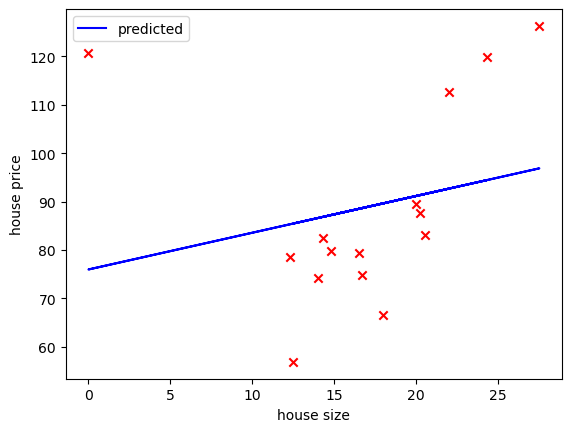

In [78]:
plt.scatter(x,y,color ="red",marker="x")
plt.plot(x,y_line,label="predicted",color = "blue")
plt.xlabel("house size")
plt.ylabel("house price")
plt.legend()
plt.show()

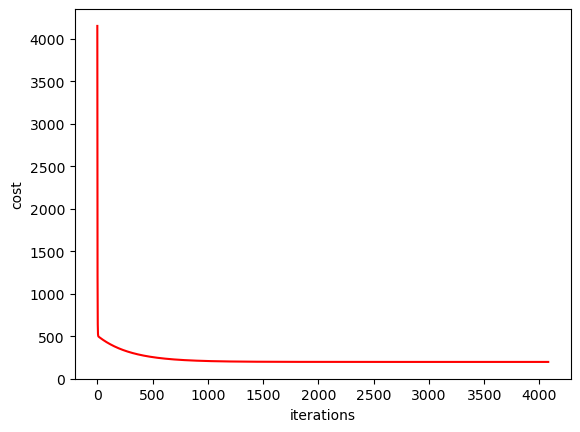

In [79]:
plt.plot(cost_history , color = "red")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show()

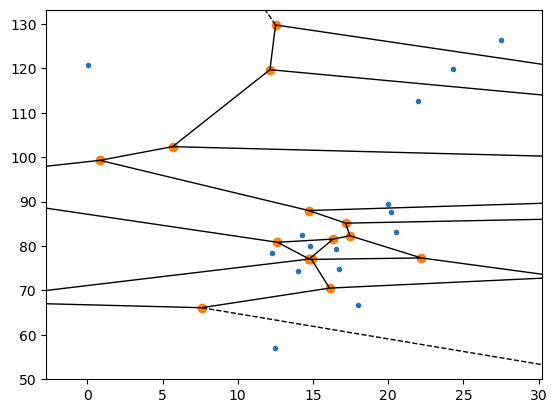

In [84]:
from scipy.spatial import Voronoi , voronoi_plot_2d
vor = Voronoi(np.column_stack((x,y)))
fig = voronoi_plot_2d(vor)